In [1]:
import numpy as np
import  pandas as pd
from matplotlib import pyplot as plt
import random
import math
import glob
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore') 

# Loading the dataset: 

In [2]:
data = glob.glob('cropped/Elyas MBarek/*.jpg')
data += glob.glob('cropped/Han Ye-seul/*.jpg')
data += glob.glob('cropped/Mahira Khan/*.jpg')
data += glob.glob('cropped/Ramy Youssef/*.jpg')
data += glob.glob('cropped/Riyad Mahrez/*.jpg')

print(f'This data has {len(data)} images')

This data has 1288 images


### 2. Resize all the images  :

In [3]:
# Resize the image
def resize_image(image_path, width, height, grayscale=False):
    image = cv2.imread(image_path)
    # Resize the image to the given width and height
    resized_image = cv2.resize(image, (width, height))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    
    # Optionally convert to grayscale
    if grayscale:
        resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        
    resized_image = resized_image / 255
    return resized_image

In [4]:
Images = []
for img in data:
    Images.append(resize_image(img,32,32))
    

### 2. Labeled the images:

In [5]:
# Create a mapping for labels
label_map = {'Mahira Khan': 0, 'Han Ye-seul': 1, 'Riyad Mahrez': 2, 'Elyas MBarek': 3, 'Ramy Youssef': 4}

# Assign labels using a list comprehension
Y = np.array([label_map[x.split('\\')[0].split('/')[-1]] for x in data])

# Convert images to numpy array (if not already)
Images = np.array(Images)

# Shuffle the dataset
Images, Y = shuffle(Images, Y, random_state=0)


In [6]:
def display(images,a):
        m,n = 1, int(len(images)/a)
        for i in range(0,len(images),m*n):
            fig = plt.figure(figsize=(15,8))
            for j in range(m*n):
                fig.add_subplot(m,n,j+1)
                plt.imshow(images[i+j])
                plt.axis('off')
            plt.show()

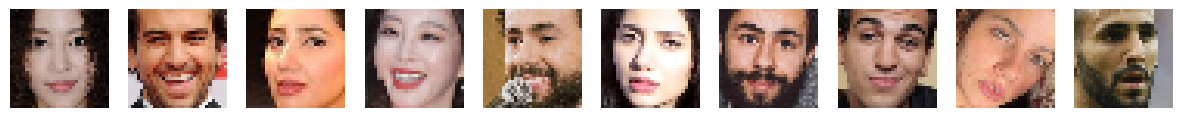

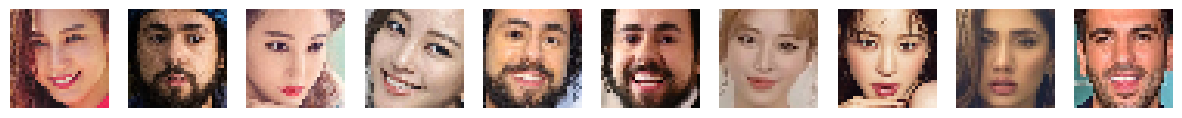

In [7]:
# Display a subset of the images
display(Images[2:22], 2)

# Split the images into train and test:

In [8]:
train,test ,ytrain,ytest =train_test_split(Images, Y, train_size=0.8)
print(f'train: {train.shape}, Test: {test.shape}')

train: (1030, 32, 32, 3), Test: (258, 32, 32, 3)


In [9]:
# reshape train and test:
train = train.reshape(train.shape[0], -1)
test = test.reshape(test.shape[0], -1)
print(f'train: {train.shape}, Test: {test.shape}')

train: (1030, 3072), Test: (258, 3072)


# Train the model:

In [10]:
def evaluate_model(true, predicted):
    # Accuracy
    accuracy = accuracy_score(true, predicted)
    
    # Precision (micro, macro, weighted average for multi-class)
    precision = precision_score(true, predicted, average='weighted')
    
    # Recall (micro, macro, weighted average for multi-class)
    recall = recall_score(true, predicted, average='weighted')
    
    # F1-Score (micro, macro, weighted average for multi-class)
    f1 = f1_score(true, predicted, average='weighted')
    
    # Confusion Matrix
    cm = confusion_matrix(true, predicted)
    
    return accuracy, precision, recall, f1, cm

In [11]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='rbf'),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42),
    "Random Forest" : RandomForestClassifier(n_estimators=100, random_state=42)
}

In [12]:
model_list = []
Acc_list =[]
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(train, ytrain) # Train model

    # Make predictions
    ytrain_pred = model.predict(train)
    ytest_pred = model.predict(test)
    
    # Evaluate Train and Test dataset
    train_acc, train_pre, train_rec, train_f1, train_cm = evaluate_model(ytrain, ytrain_pred)

    test_acc, test_pre, test_rec, test_f1, test_cm = evaluate_model(ytest, ytest_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(train_acc))
    print("- precision: {:.4f}".format(train_pre))
    print("- recall: {:.4f}".format(train_rec))
    print("- R1 Score: {:.4f}".format(train_f1))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(test_acc))
    print("- precision: {:.4f}".format(test_pre))
    print("- recall: {:.4f}".format(test_rec))
    print("- R1 Score: {:.4f}".format(test_f1))
    Acc_list.append(test_acc)
    
    print('='*35)
    print('\n')

  File "c:\Users\pc lenovo\.conda\envs\tensorflow_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KNN
Model performance for Training set
- Accuracy: 0.9039
- precision: 0.9142
- recall: 0.9039
- R1 Score: 0.9060
----------------------------------
Model performance for Test set
- Accuracy: 0.8295
- precision: 0.8542
- recall: 0.8295
- R1 Score: 0.8304


SVM
Model performance for Training set
- Accuracy: 0.9544
- precision: 0.9550
- recall: 0.9544
- R1 Score: 0.9545
----------------------------------
Model performance for Test set
- Accuracy: 0.8798
- precision: 0.8834
- recall: 0.8798
- R1 Score: 0.8804


Naive Bayes
Model performance for Training set
- Accuracy: 0.7301
- precision: 0.7312
- recall: 0.7301
- R1 Score: 0.7278
----------------------------------
Model performance for Test set
- Accuracy: 0.7054
- precision: 0.7168
- recall: 0.7054
- R1 Score: 0.7007


Decision Tree
Model performance for Training set
- Accuracy: 0.6612
- precision: 0.6896
- recall: 0.6612
- R1 Score: 0.6583
----------------------------------
Model performance for Test set
- Accuracy: 0.5891
- precision:

In [14]:
pd.DataFrame(list(zip(model_list, Acc_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy
1,SVM,0.879845
4,Random Forest,0.868217
0,KNN,0.829457
2,Naive Bayes,0.705426
3,Decision Tree,0.589147


# Evaluating the model using SVM: